# Métricas, datos y calibración inteligente

## Lectura de los archivos de datos base y experimentales

Importamos librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importamos los datasets

In [2]:
#Importar la hoja Normal y dejar las columnas Date&Time (A) y PM2.5 (C), se elimina la segunda fila y los datos nulos
normal = pd.read_excel("../../Datos/datosSensores/Datos Estaciones AMB.xlsx", sheet_name="Normal",
                       usecols="A,C", skiprows=[1], names=["Date", "PM25"]).dropna()

#Eliminamos los datos que no son float
normal = normal[normal["PM25"].apply(lambda x: isinstance(x, float))]

#Convertimos PM25 a float y Date a datetime
normal["PM25"] = normal["PM25"].astype(float)
normal["Date"] = pd.to_datetime(normal["Date"])

#Resetear el indice
normal.reset_index(drop=True, inplace=True)

In [3]:
#Importamos los diferentes datos de las estaciones segun mes
prename = "..\..\Datos\datosSensores\mediciones_clg_normalsup_pm25_a_"
noviembre18 = pd.read_csv(prename+"2018-11-01T00_00_00_2018-11-30T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
diciembre18 = pd.read_csv(prename+"2018-12-01T00_00_00_2018-12-31T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
abril19 = pd.read_csv(prename+"2019-04-01T00_00_00_2019-04-30T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
mayo19 = pd.read_csv(prename+"2019-05-01T00_00_00_2019-05-31T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
junio19 = pd.read_csv(prename+"2019-06-01T00_00_00_2019-06-30T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
julio19 = pd.read_csv(prename+"2019-07-01T00_00_00_2019-07-31T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)
agosto19 = pd.read_csv(prename+"2019-08-01T00_00_00_2019-08-31T23_59_59.csv", usecols=[0,2], names=["Date", "PM25"], skiprows=1)

#Convertimos PM25 a float y Date a datetime
for i in [noviembre18, diciembre18, abril19, mayo19, junio19, julio19, agosto19]:
    i["PM25"] = i["PM25"].astype(float)
    i["Date"] = pd.to_datetime(i["Date"])

#Ordenamos los datos por fecha de menor a mayor y unimos los datos de las estaciones
estaciones = pd.concat([noviembre18, diciembre18, abril19, mayo19, junio19, julio19, agosto19]).sort_values(by="Date").reset_index(drop=True)

#

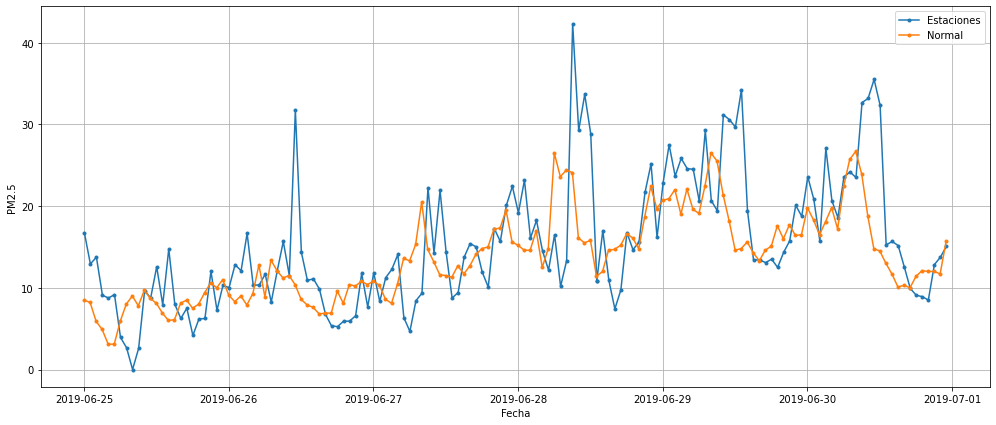

In [10]:
estaciones_12_12 = estaciones[estaciones["Date"].dt.month == 6]
estaciones_12_12 = estaciones_12_12[estaciones_12_12["Date"].dt.day >= 25]

#Plotting data from estaciones
plt.figure(figsize=(17,7))
plt.plot(estaciones_12_12.Date, estaciones_12_12.PM25, ".-", label="Estaciones")
plt.plot(normal_2018["Date"], normal_2018["PM25"], ".-", label="Normal")
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("PM2.5")
plt.grid()
plt.show()

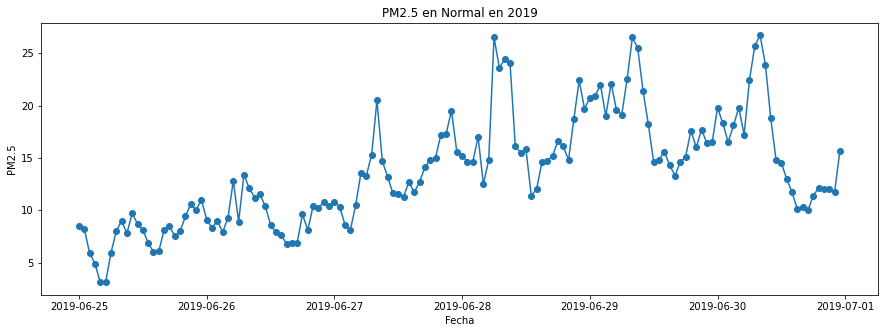

In [8]:
#Plotting data from december 2018
# normal_2018 = normal[normal["Date"].dt.year == 2018]
normal_2018 = normal[normal["Date"].dt.month == 6]
normal_2018 = normal_2018[normal_2018["Date"].dt.day >= 25]

#Graficamos normal_2019
plt.figure(figsize=(15, 5))
plt.scatter(normal_2018["Date"], normal_2018["PM25"])
plt.plot(normal_2018["Date"], normal_2018["PM25"])
plt.title("PM2.5 en Normal en 2019")
plt.xlabel("Fecha")
plt.ylabel("PM2.5")
plt.show()

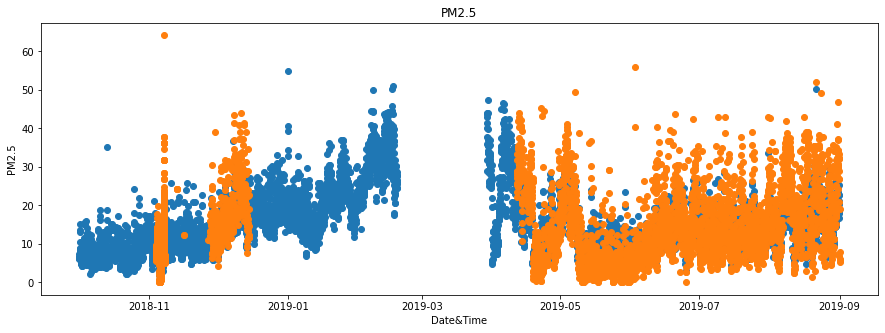

In [11]:
#Cambiamos los tipos de datos a datetime y float
# normal.Date = pd.to_datetime(normal["Date&Time"])

#Realizamos un resample de los datos a 1 hora


#Graficamos los datos de PM2.5
plt.figure(figsize=(15,5))
plt.scatter(normal["Date"], normal["PM25"])
plt.scatter(estaciones.Date, estaciones.PM25)
plt.title("PM2.5")
plt.xlabel("Date&Time")
plt.ylabel("PM2.5")
plt.show()

In [51]:
#Show dates where both normal and estaciones have data at the same time
print(normal[normal["Date"].isin(estaciones["Date"])])
print(estaciones[estaciones["Date"].isin(normal["Date"])])Markdown
print(normal[normal["Date"].isin(estaciones["Date"])].shape)
print(estaciones[estaciones["Date"].isin(normal["Date"])].shape)


Empty DataFrame
Columns: [Date, PM25]
Index: []
Empty DataFrame
Columns: [Date, PM25]
Index: []
(0, 2)
(0, 2)
